C:\Users\ernan\AppData\Local\Temp\ipykernel_2396\804457692.py:73: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, interval=50)


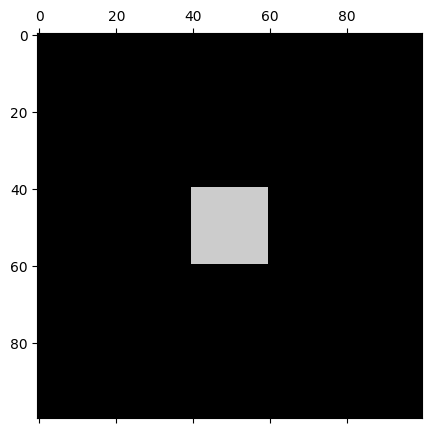

In [1]:
# -*- coding: utf-8 -*-

"""This is a simple implementation of a heat equation solver based on a cellular automaton in Python. It uses matplotlib's matshow to represent the cells' temperature. Cells can be heated by clicking and the animation can be controlled by the keyboard (spacebar to play/pause append the right arrow button to advance by one frame)."""

# first we import necessary packages: numpy (for arrays), pyplot and animation (for visualization)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# then we declare necessary global variables
rows = 100      # number of rows
cols = 100      # number of columns
hot = 1       # value of a cell that is hot
cold = 0        # value of a cold cell
cp = 0
pause = True    # pause flag

# now we can create the grid and fill them with cold cells
cell = np.full((rows, cols), cold)
# we add a starting configuration (block)
for i in range(40, 60):
    for j in range(40, 60):
        cell[i, j] = hot


# we need a function that updates the plot each frame
def update(*args):
    if not pause:
        advance()

# this is the main function that advances the animation by one frame (time step)
def advance(*args):
    global cell
    # we create a new (actual) copy of all cell states
    newcell = cell.copy()
    # and then sum up the values of all neighboring cells and find the average
    for i in range(rows):
        for j in range(cols):
            total = (cp*cell[i, j] + cell[i, (j - 1) % cols] + cell[i, (j + 1) % cols] + cell[(i - 1) % rows, j] + cell[(i + 1) % rows, j] + cell[(i - 1) % rows, (j - 1) % cols] + cell[(i - 1) % rows, (j + 1) % cols] + cell[(i + 1) % rows, (j - 1) % cols] + cell[(i + 1) % rows, (j + 1) % cols])
            avg = total/(9.0+cp)
            newcell[i, j] = avg
    # the new cells are now the old cells and are returned
    grid.set_data(newcell)
    cell = newcell
    return [grid]

# this catches keyboard events (spacebar for play/pause, right arrow key for advancing one frame)
def press(event):
    global pause
    if event.key == " ":
        pause = not pause
        return pause
    elif event.key == "right":
        advance()

# catches mouseclick events to draw hot cells
def click(event):
    if pause:
        global cell
        if isinstance(event.xdata, float) and isinstance(event.ydata, float):
            j = int(round(event.xdata))
            i = int(round(event.ydata))
            cell[i, j] = hot
            grid.set_data(cell)
    return grid

# plot and animation commands
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot()
grid = ax.matshow(cell, cmap="nipy_spectral")
fig.canvas.mpl_connect('key_press_event', press)
fig.canvas.mpl_connect('button_press_event', click)
ani = animation.FuncAnimation(fig, update, interval=50)
plt.show()